In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2
import texthero as hero
from texthero import preprocessing
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [17]:
data = pd.read_csv('dataset.csv')
data.head()
df = data.fillna(0)
df

,id,primary,Title,Autherkeywords,Indexkeywords,Author,AuthorsID,Volume,Issue,Year,...,LINK_CLICK_COUNT,LINK_OUTS,READER_COUNT,REFERENCE_COUNT,TWEET_COUNT,capture,citation,mention,socialMedia,usage
0,1,1.0,Toward a combined method for evaluation of web...,0.0,0.0,"Acosta-Vargas P., LujÃŒÃÅn-Mora S., Acosta T.,...",57192678428;6603381780;57200384739;57192689183;,0.0,0.0,2018,...,0.0,0.0,41.0,0.0,0.0,41.0,13.0,0.0,0.0,0.0
1,2,1.0,Evaluation of the quality and accessibility of...,0.0,0.0,"Valizadeh-Haghi S., Rahmatizadeh S.",57201397148;26423231100;,0.0,0.0,2018,...,0.0,0.0,31.0,0.0,1.0,31.0,11.0,0.0,1.0,0.0
2,3,1.0,Website accessibility in the tourism industry:...,0.0,0.0,"DomÃŒ_nguez Vila T., AlÃŒÂ©n GonzÃŒÃÅlez E., D...",55618623800;57209476703;8062952900;,0.0,0.0,2018,...,0.0,43.0,68.0,0.0,1.0,86.0,10.0,0.0,1.0,583.0
3,4,1.0,Methodology for heuristic evaluation of web ac...,0.0,0.0,"Orozco A., Tabares V., Duque N.",57190276125;55575533200;44061104100;,0.0,0.0,2016,...,0.0,0.0,22.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0
4,5,1.0,Using WCAG 2.0 and heuristic evaluation to eva...,0.0,0.0,"Debevc M., KoÂÅ_uh I., Hauptman S., Klembas A....",56816724400;54412464700;56938486900;5700666390...,0.0,0.0,2015,...,0.0,0.0,23.0,0.0,0.0,23.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,69,0.0,Accessibility issues of educational web sites,0.0,0.0,Kurt S.,36015586400;,0.0,0.0,2011,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71,70,0.0,Haptic rendering of HTML components and 2D map...,0.0,0.0,"Kaklanis N., Moustakas K., Tsovaras D.",25825005600;6507331953;56128792900;,0.0,0.0,2011,...,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
72,71,0.0,"Virtual tourism: Functions, profit modes and p...",0.0,0.0,"Zhao J., de Pablos P.O., Tenysson R.",35097921600;24334594300;56114137800;,0.0,0.0,2011,...,0.0,0.0,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
73,72,0.0,E-health and digital inclusion,0.0,0.0,"Gibson L., Sloan D., Moncur W.",36899526000;35269936300;22835289500;,0.0,0.0,2011,...,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0


In [18]:
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_brackets
                  ]

df['clean_text'] = hero.clean(df['Title'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]
df['tfidf'] = (hero.tfidf(df['clean_text'], max_features=3000))
df['sentence_vector'] = np.mean(df['tfidf'].tolist(), axis=1)
df['tsnetfidf'] = hero.tsne(df['tfidf'])
del df['clean_text']
del df['tfidf']
del df['tsnetfidf']
del df['Author']
del df['AuthorsID']
del df['Volume']
del df['Issue']
del df['Autherkeywords']
del df['Indexkeywords']

df.iloc[:,22:]


,ABSTRACT_VIEWS,ALL_BLOG_COUNT,CITED_BY_COUNT,DOWNLOAD_COUNT,EXPORTS_SAVES,FACEBOOK_COUNT,FULL_TEXT_VIEWS,LINK_CLICK_COUNT,LINK_OUTS,READER_COUNT,REFERENCE_COUNT,TWEET_COUNT,capture,citation,mention,socialMedia,usage,sentence_vector
0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,41.0,13.0,0.0,0.0,0.0,0.008067
1,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,1.0,31.0,11.0,0.0,1.0,0.0,0.009169
2,540.0,0.0,10.0,0.0,18.0,0.0,0.0,0.0,43.0,68.0,0.0,1.0,86.0,10.0,0.0,1.0,583.0,0.010357
3,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,22.0,5.0,0.0,0.0,0.0,0.009142
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,23.0,5.0,0.0,0.0,0.0,0.010346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006561
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.009526
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.008439
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.005558


In [19]:
X = df.iloc[:,22:]
Y = df.iloc[:,1]
X
Y

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
Name: primary, Length: 75, dtype: float64

In [20]:
best = SelectKBest(score_func=chi2, k=15)
fit = best.fit(X,Y)

In [21]:
df_score = pd.DataFrame(fit.scores_)
df_cols = pd.DataFrame(X.columns)

In [22]:
f_score = pd.concat([df_cols,df_score],axis=1)
f_score.columns = ['Specs','score']

In [23]:
f_score

,Specs,score
0,ABSTRACT_VIEWS,3.499345
1,ALL_BLOG_COUNT,0.153846
2,CITED_BY_COUNT,1.558851
3,DOWNLOAD_COUNT,0.153846
4,EXPORTS_SAVES,11.552198
5,FACEBOOK_COUNT,9.955696
6,FULL_TEXT_VIEWS,67.846154
7,LINK_CLICK_COUNT,0.769231
8,LINK_OUTS,7.620936
9,READER_COUNT,11.796827


In [24]:
print(f_score.nlargest(10,'score'))

              Specs      score
6   FULL_TEXT_VIEWS  67.846154
16            usage  24.323672
15      socialMedia  13.149972
9      READER_COUNT  11.796827
4     EXPORTS_SAVES  11.552198
5    FACEBOOK_COUNT   9.955696
8         LINK_OUTS   7.620936
11      TWEET_COUNT   3.605769
0    ABSTRACT_VIEWS   3.499345
12          capture   3.435069


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [26]:
print(model.feature_importances_)

[3.06364329e-02 1.41473386e-04 2.39195256e-01 2.91206357e-04
 1.46732688e-02 3.18611192e-02 7.79003987e-03 1.00312329e-03
 2.49939302e-02 9.47031519e-02 2.69062241e-04 3.04565065e-02
 9.02671559e-02 2.42418276e-01 1.21758293e-03 2.94226362e-02
 3.19277508e-02 1.28732027e-01]


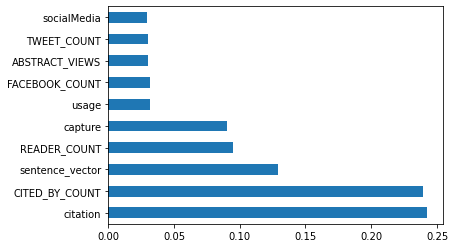

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

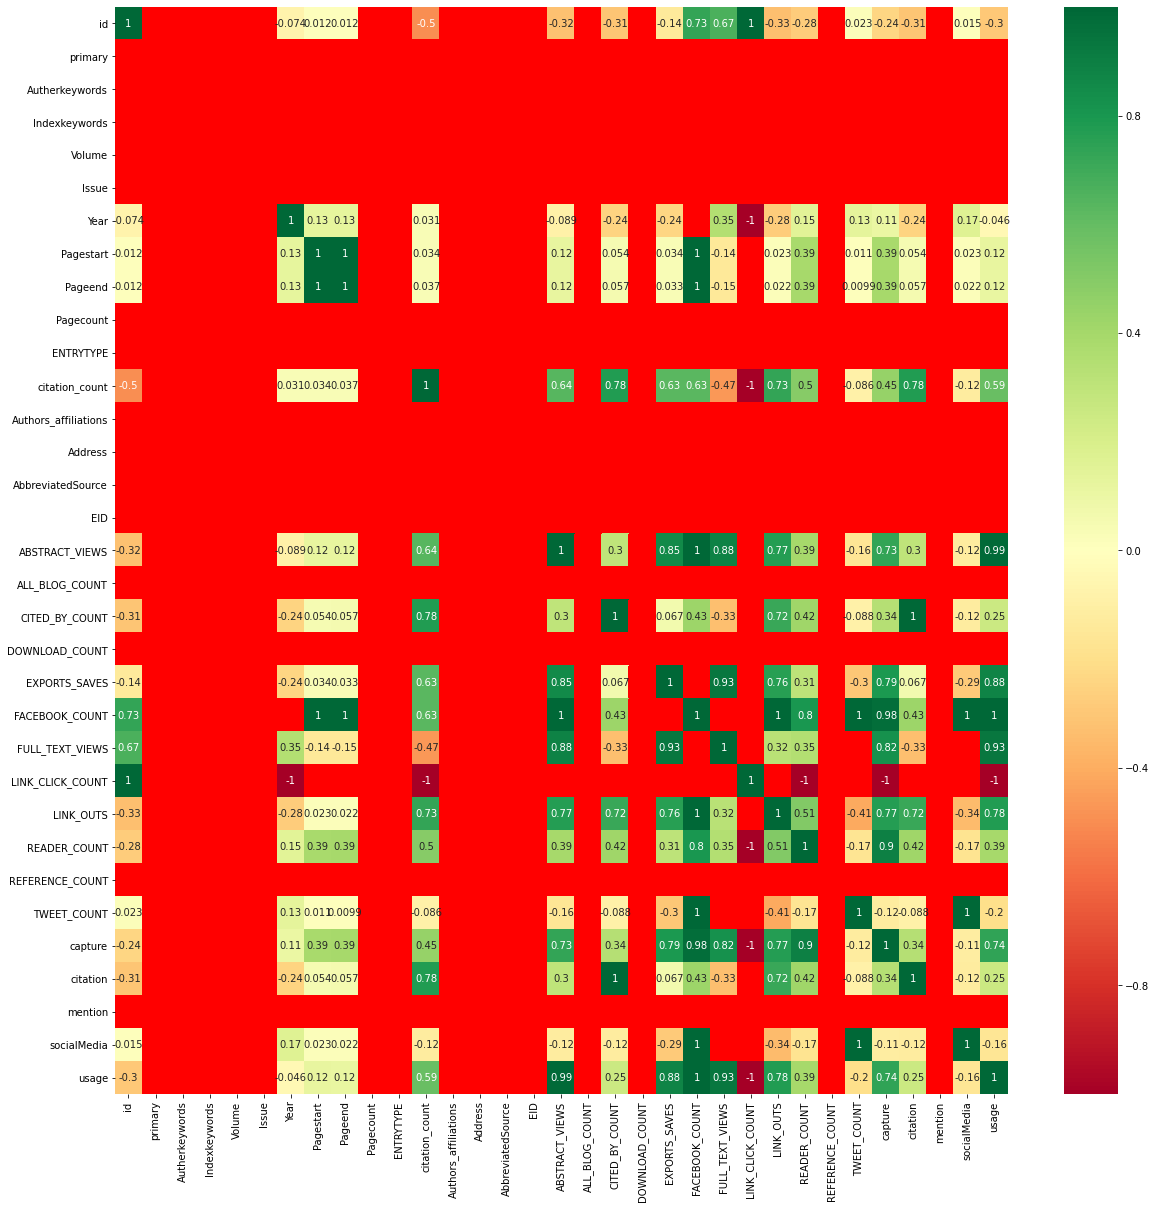

In [28]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('red') 
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap=color)
warnings.filterwarnings("ignore",category=UserWarning)